In [63]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format


In [93]:
def obtener_full_path(directorio):
    return [os.path.join(directorio, file) for file in os.listdir(directorio)]

def plottear_eje(y, df):
    fig, axis = plt.subplots(1, 1, figsize=(30, 6))
    sns.barplot(data=df, x='Destino', y=y, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
    plt.show()
    return fig


In [94]:
df = pd.concat(map(lambda x: pd.read_csv(x, parse_dates=[
               0], dayfirst=True), obtener_full_path('input')))
df = df.sort_values('Fecha')


In [95]:
df_salidas = df.query('Movimiento == "Salida"')
costos_por_unidades = df_salidas.groupby('Destino').sum().reset_index()
costos_por_unidades['Porcentaje Gasto'] = costos_por_unidades['Neto Total'] / \
    costos_por_unidades['Neto Total'].sum()


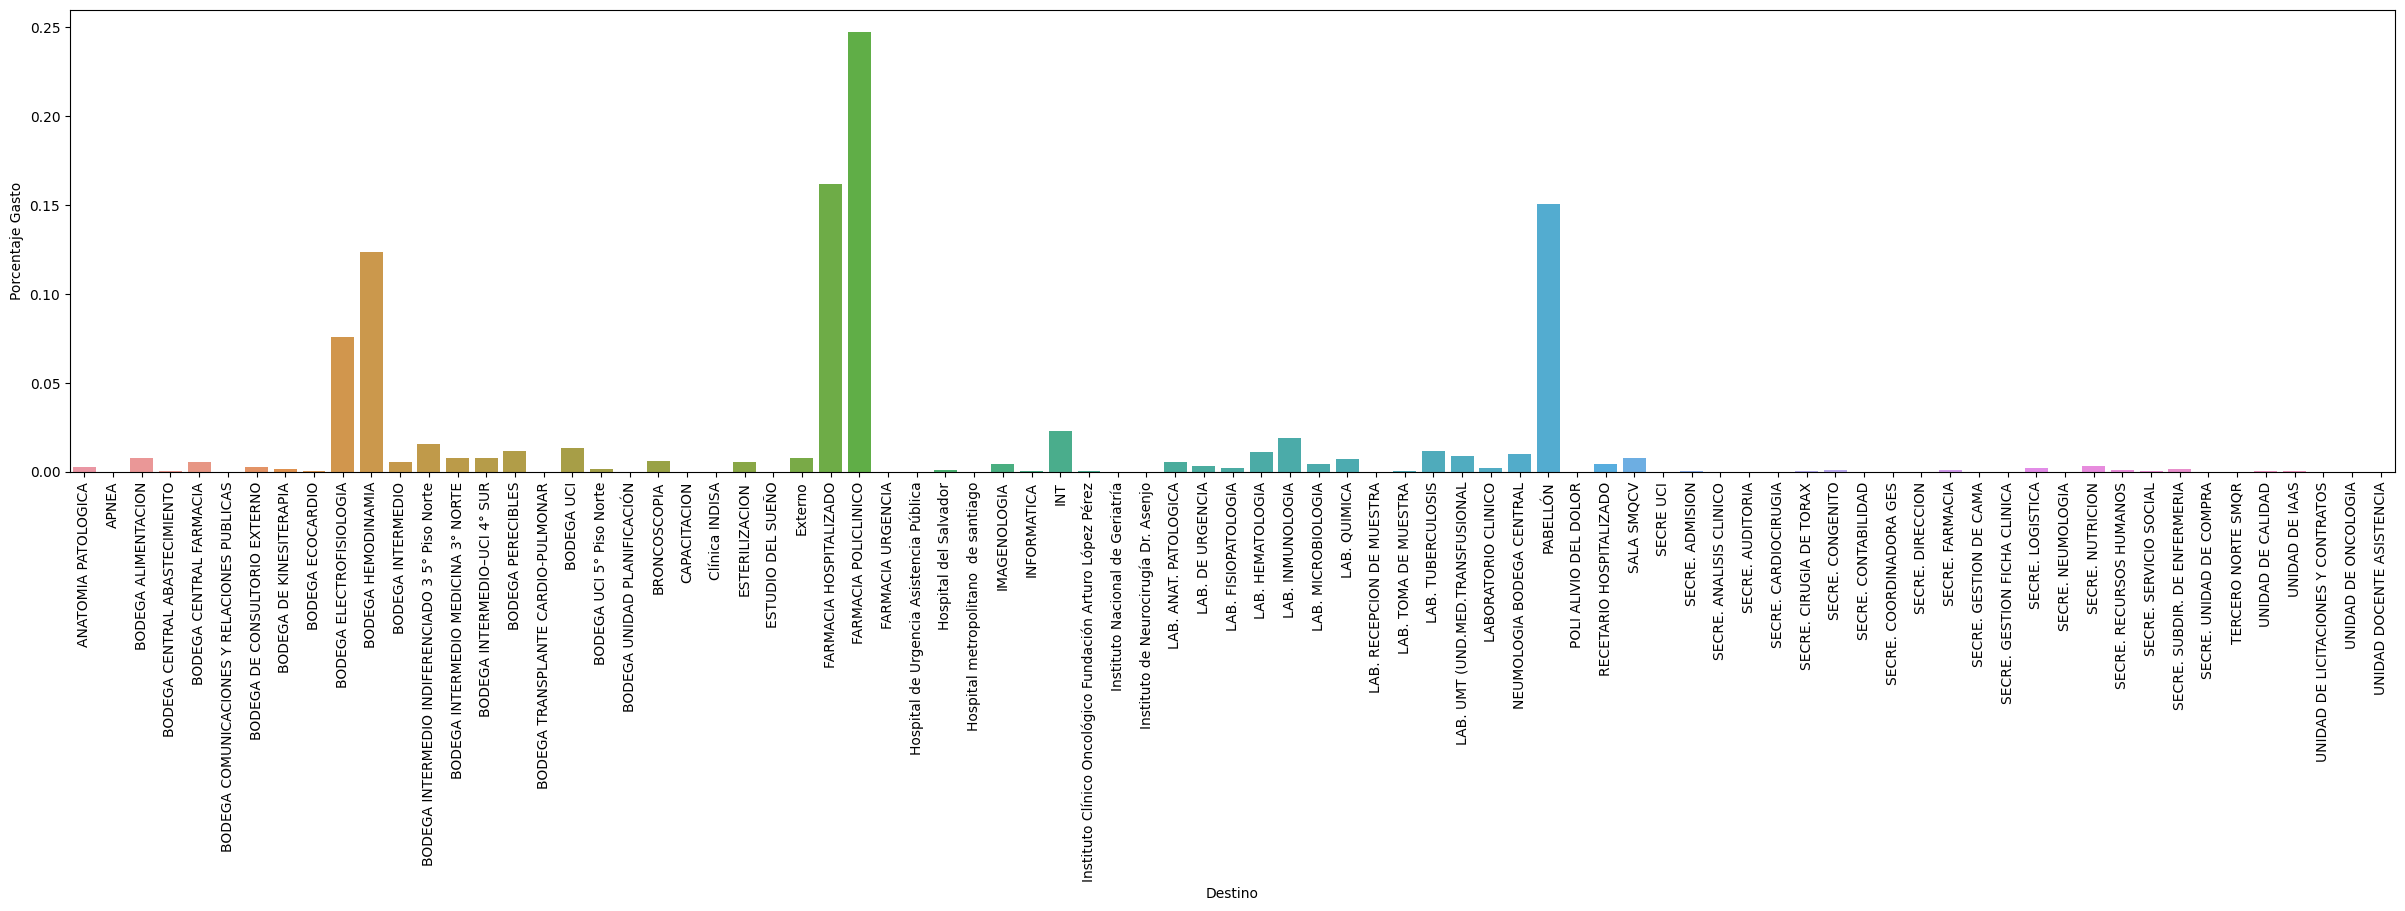

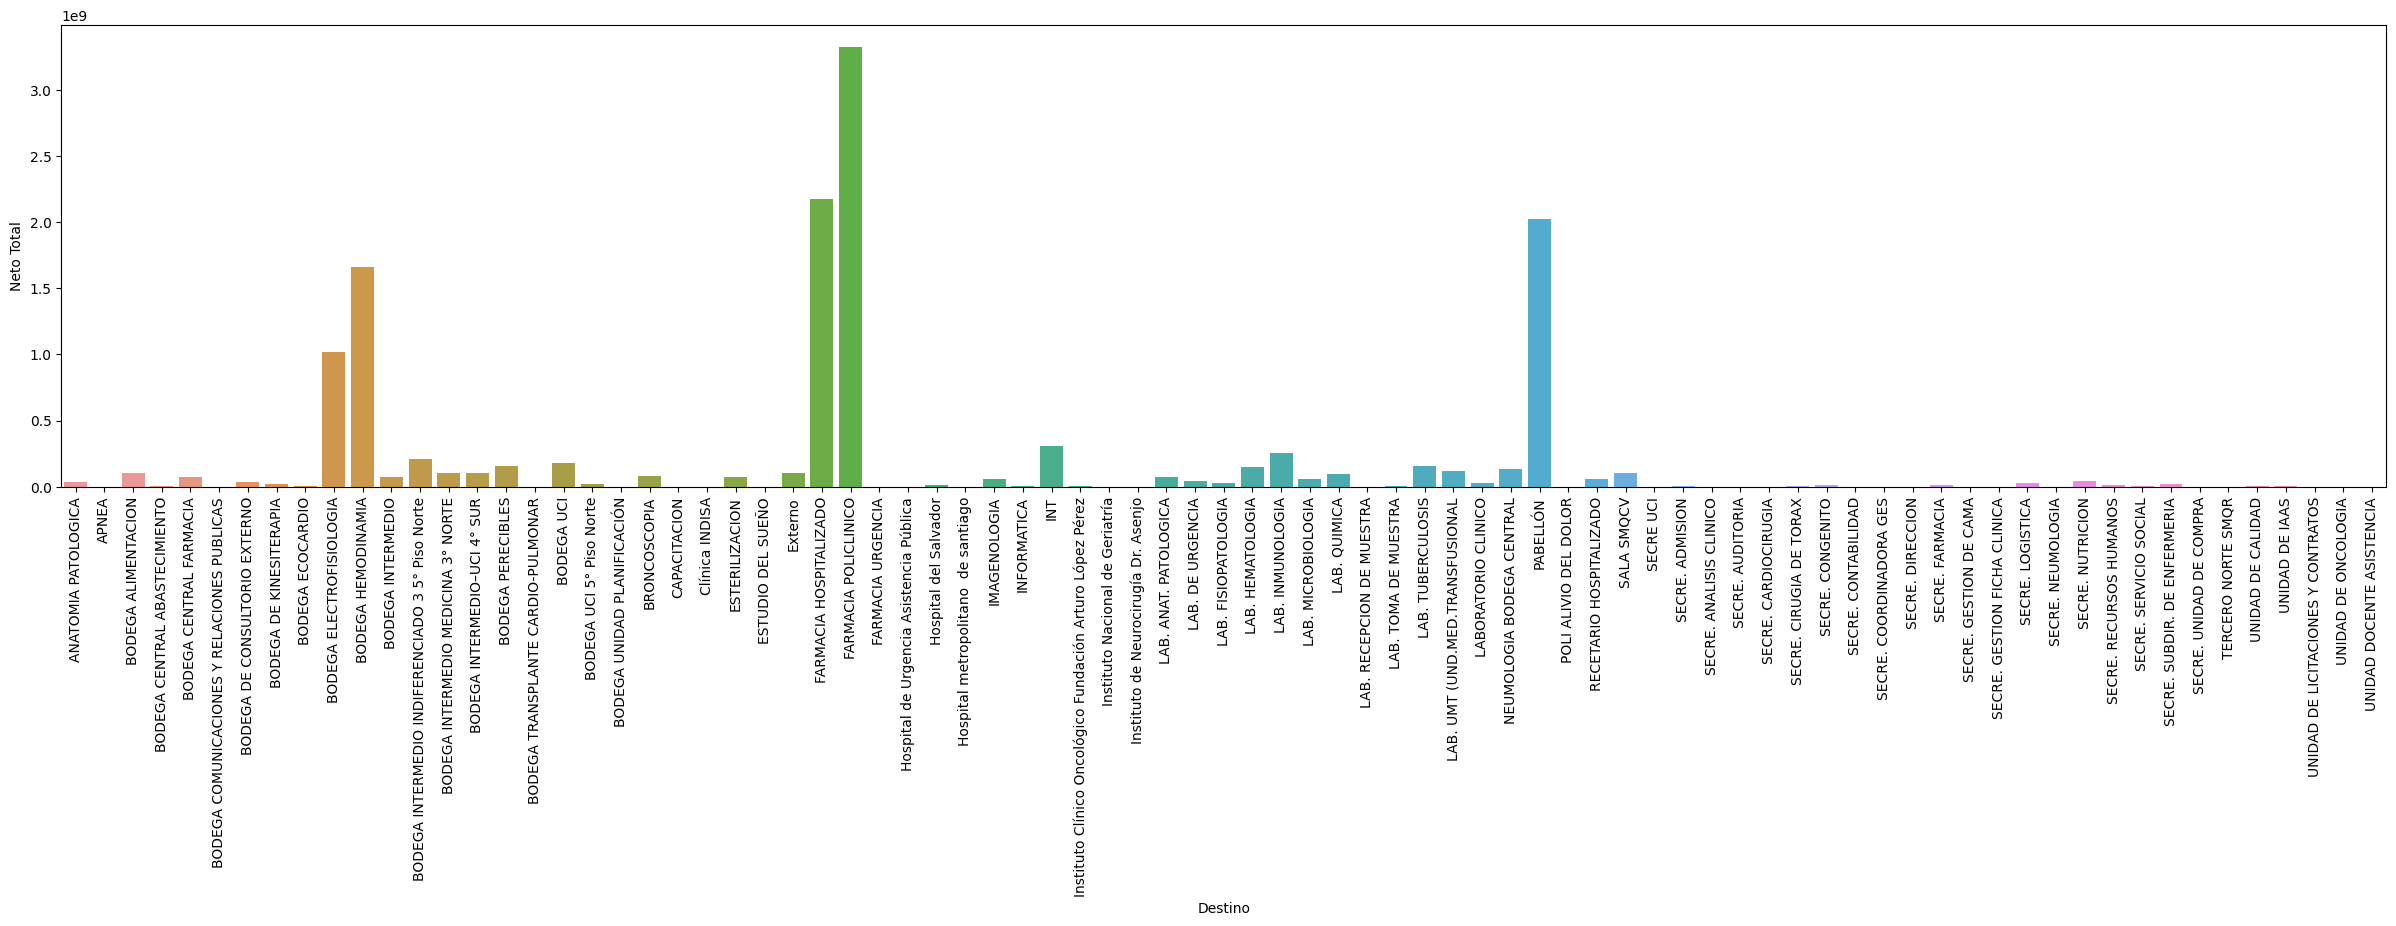

In [96]:
figura_porcentaje_global = plottear_eje(y='Porcentaje Gasto', df=costos_por_unidades)
figura_gasto_neto_global = plottear_eje(y='Neto Total', df=costos_por_unidades)


In [97]:
gastos_mayores_a_1000000000 = costos_por_unidades.query('`Neto Total` >= 1000000000')
gastos_menores_a_1000000000 = costos_por_unidades.query('`Neto Total` < 1000000000')

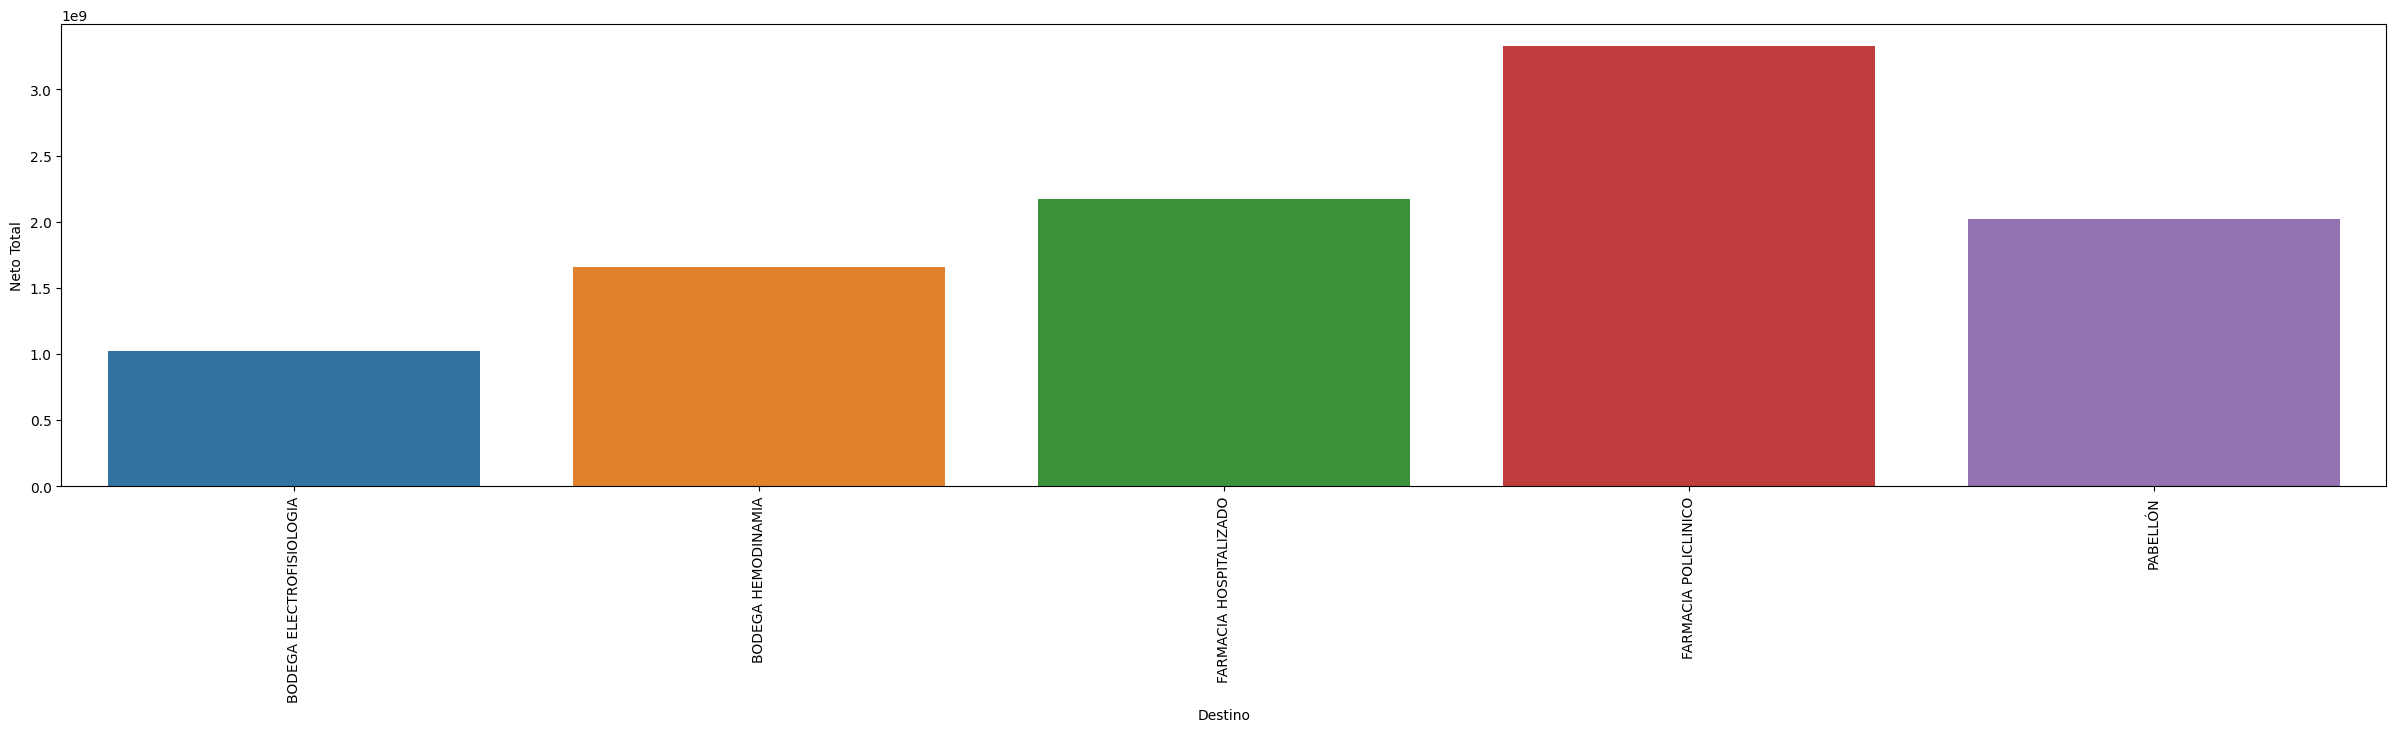

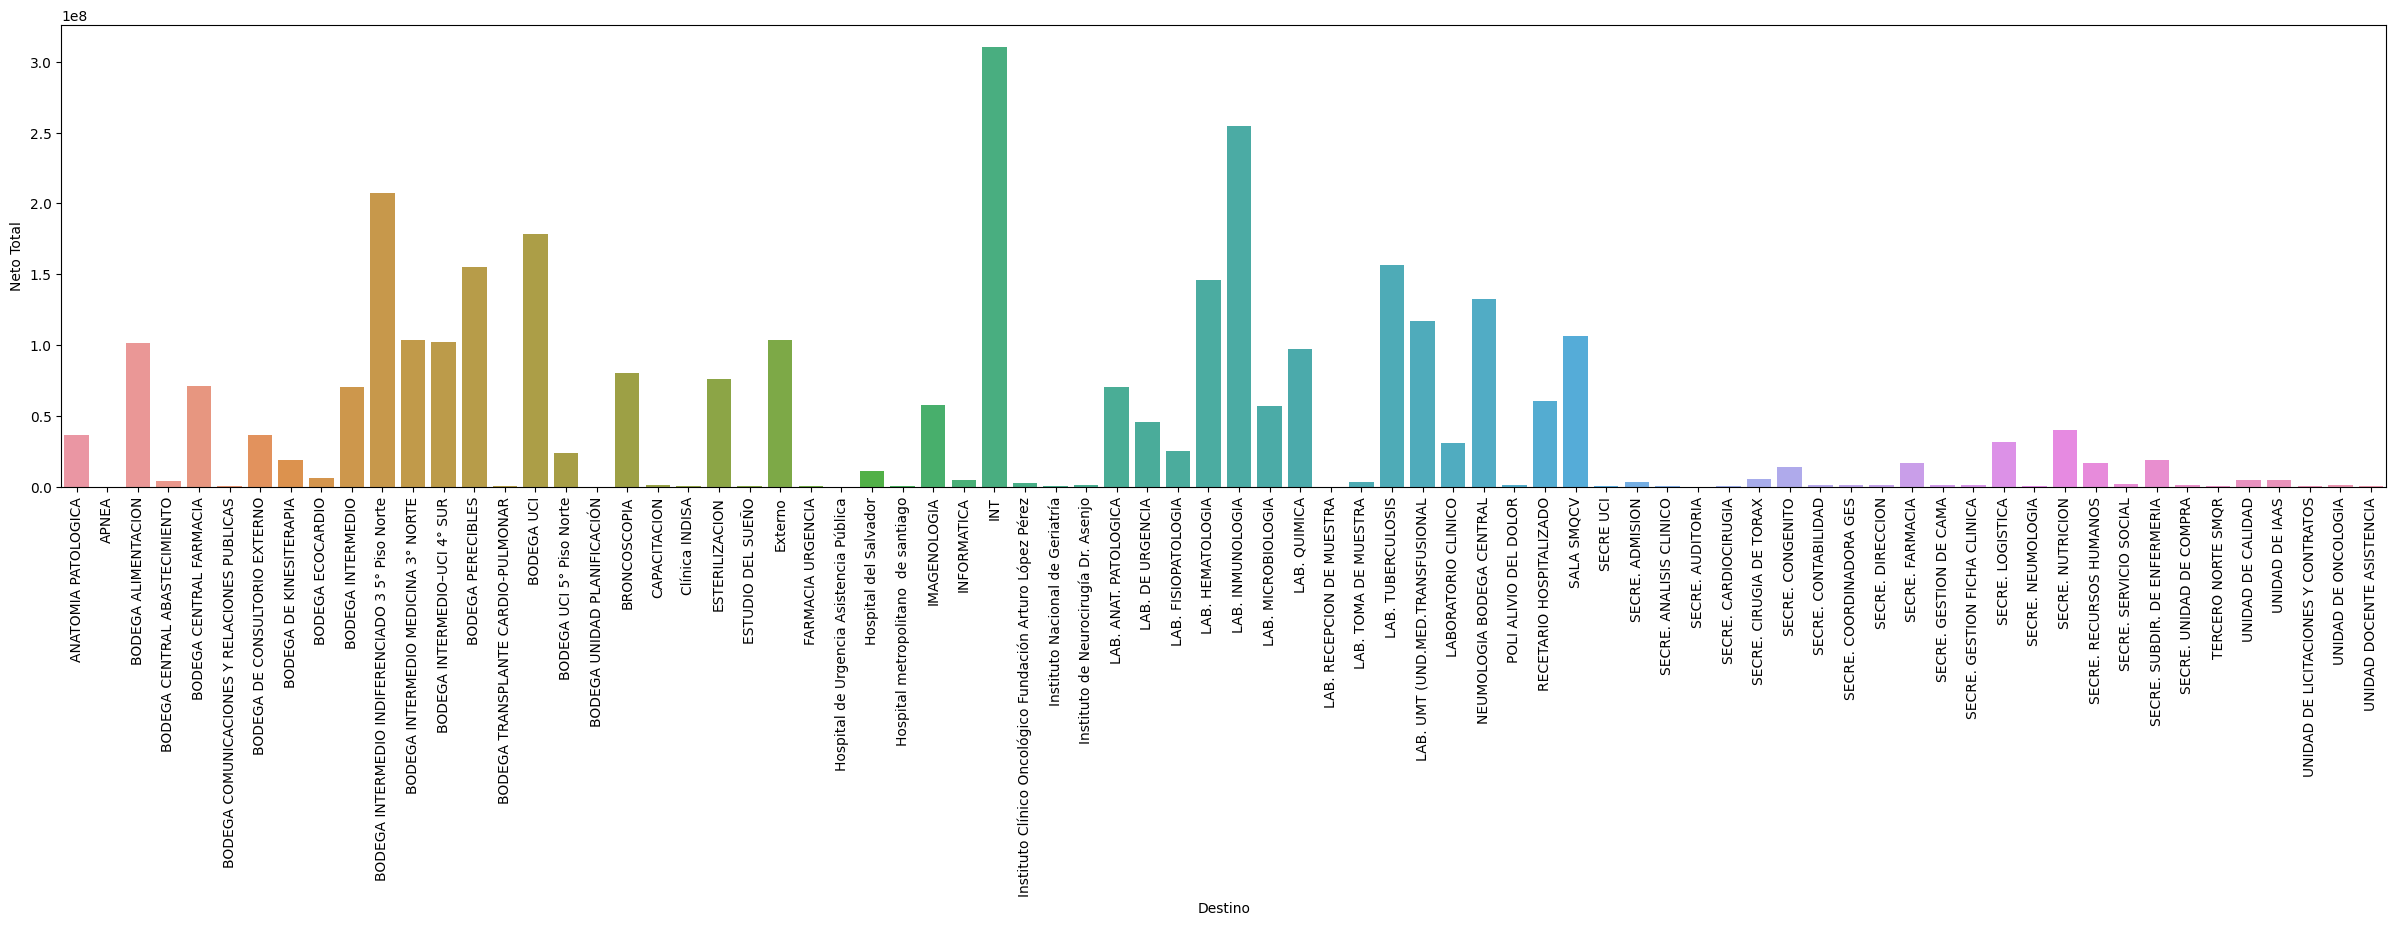

In [99]:
figura_gastos_mayores_a_1e9_total = plottear_eje(y='Neto Total', df=gastos_mayores_a_1000000000)
figura_gastos_menores_a_1e9_total = plottear_eje(y='Neto Total', df=gastos_menores_a_1000000000)